# Day and Night Image Classifier
---

The day/night image dataset consists of 200 RGB color images in two categories: day and night. There are equal numbers of each example: 100 day images and 100 night images.

We'd like to build a classifier that can accurately label these images as day or night, and that relies on finding distinguishing features between the two types of images!

*Note: All images come from the [AMOS dataset](http://cs.uky.edu/~jacobs/datasets/amos/) (Archive of Many Outdoor Scenes).*


In [1]:
import cv2 
import helpers

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline

## Training and Testing Data
The 200 day/night images are separated into training and testing datasets. 

* 60% of these images are training images.
* 40% are test images.

In [2]:
# Image data directories
image_dir_training = "day_night_images/training/"
image_dir_test = "day_night_images/test/"

## Load the datasets

These first few lines of code will load the training day/night images and store all of them in a variable, `IMAGE_LIST`. This list contains the images and their associated label ("day" or "night"). 

For example, the first image-label pair in `IMAGE_LIST` can be accessed by index: 
``` IMAGE_LIST[0][:]```.


In [3]:
# Using the load_dataset function in helpers.py
# Load training data
IMAGE_LIST = helpers.load_dataset(image_dir_training)

## Construct a `STANDARDIZED_LIST` of input images and output labels.

This function takes in a list of image-label pairs and outputs a **standardized** list of resized images and numerical labels.

In [4]:
# Standardize all training images (resize images and perfon integer encoding)
STANDARDIZED_LIST = helpers.standardize(IMAGE_LIST)

## Visualize the standardized data

Display a standardized image from STANDARDIZED_LIST.

Shape: (600, 1100, 3)
Label [1 = day, 0 = night]: 1


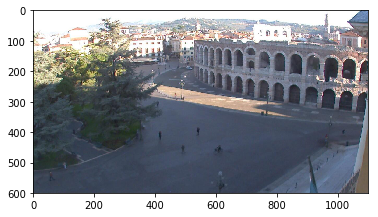

In [5]:
# Display a standardized image and its label

# Select an image by index
image_num = 0
selected_image = STANDARDIZED_LIST[image_num][0]
selected_label = STANDARDIZED_LIST[image_num][1]

# Display image and data about it
plt.imshow(selected_image)
print("Shape: "+str(selected_image.shape))
print("Label [1 = day, 0 = night]: " + str(selected_label))


# Feature Extraction

Create a feature that represents the brightness in an image. 

---
###  Find the average brigtness using the V channel

This function takes in a **standardized** RGB image and returns a feature (a single value) that represent the average level of brightness in the image. 

In [6]:
# Find the average Value or brightness of an image
def avg_brightness(rgb_image):
    # Convert image to HSV
    hsv = cv2.cvtColor(rgb_image, cv2.COLOR_RGB2HSV)

    # Add up all the pixel values in the V channel
    sum_brightness = np.sum(hsv[:,:,2])
    area = 600*1100.0  # pixels
    
    # find the avg
    avg = sum_brightness/area
    
    return avg

Avg brightness: 89.1588606061


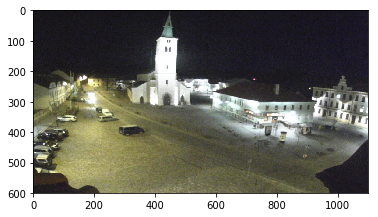

In [7]:
# Testing average brightness levels

# As an example, a "night" image is loaded in and its avg brightness is displayed
image_num = 190
test_im = STANDARDIZED_LIST[image_num][0]

avg = avg_brightness(test_im)
print('Avg brightness: ' + str(avg))
plt.imshow(test_im)

# Classification and Visualizing Error

In this section, we'll turn our average brightness feature into a classifier that takes in a standardized image and returns a `predicted_label` for that image. 

---
### TODO: Build a complete classifier 

Complete this code so that it returns an estimated class label given an input RGB image.

In [46]:
# This function should take in RGB image input
def estimate_label(rgb_image):
    
    # Extract average brightness feature from an RGB image 
    avg = avg_brightness(rgb_image)
        
    # Use the avg brightness feature to predict a label (0, 1)
    predicted_label = 0
    threshold = 99
    if(avg > threshold):
        # if the average brightness is above the threshold value, we classify it as "day"
        predicted_label = 1
    # else, the pred-cted_label can stay 0 (it is predicted to be "night")
    
    return predicted_label    
    

## Testing the classifier

Since we are using a pretty simple brightess feature, we may not expect this classifier to be 100% accurate. We'll aim for around 75-85% accuracy using this one feature.


### Test dataset

Below, we load in the test dataset, standardize it using the `standardize` function defined above, and then **shuffle** it; this ensures that order will not play a role in testing accuracy.

In [47]:
import random

# Using the load_dataset function in helpers.py
# Load test data
TEST_IMAGE_LIST = helpers.load_dataset(image_dir_test)

# Standardize the test data
STANDARDIZED_TEST_LIST = helpers.standardize(TEST_IMAGE_LIST)

# Shuffle the standardized test data
random.shuffle(STANDARDIZED_TEST_LIST)

## Determine the Accuracy

Compare the output of the classification algorithm with the true labels and determine the accuracy.

This code stores all the misclassified images, their predicted labels, and their true labels, in a list called `misclassified`.

In [48]:
# Constructs a list of misclassified images given a list of test images and their labels
def get_misclassified_images(test_images):
    # Track misclassified images by placing them into a list
    misclassified_images_labels = []

    # Iterate through all the test images
    # Classify each image and compare to the true label
    for image in test_images:

        # Get true data
        im = image[0]
        true_label = image[1]

        # Get predicted label from your classifier
        predicted_label = estimate_label(im)

        # Compare true and predicted labels 
        if(predicted_label != true_label):
            # If these labels are not equal, the image has been misclassified
            misclassified_images_labels.append((im, predicted_label, true_label))
            
    # Return the list of misclassified [image, predicted_label, true_label] values
    return misclassified_images_labels


In [49]:
# Find all misclassified images in a given test set
MISCLASSIFIED = get_misclassified_images(STANDARDIZED_TEST_LIST)

# Accuracy calculations
total = len(STANDARDIZED_TEST_LIST)
num_correct = total - len(MISCLASSIFIED)
accuracy = num_correct/total

print('Accuracy: ' + str(accuracy))
print("Number of misclassified images = " + str(len(MISCLASSIFIED)) +' out of '+ str(total))

Accuracy: 0.9375
Number of misclassified images = 10 out of 160


---
<a id='task9'></a>
### Visualize the misclassified images

Visualize some of the images classified wrong (in the `MISCLASSIFIED` list) and note any qualities that make them difficult to classify. 

0
its corect label is:  0  brightness:  111.84575
its corect label is:  0  brightness:  116.524931818
its corect label is:  0  brightness:  111.318112121
its corect label is:  0  brightness:  108.247386364
its corect label is:  0  brightness:  175.585825758
its corect label is:  0  brightness:  110.796512121
its corect label is:  1  brightness:  98.8939272727
its corect label is:  0  brightness:  106.484389394
its corect label is:  1  brightness:  93.1848878788
its corect label is:  0  brightness:  176.838442424


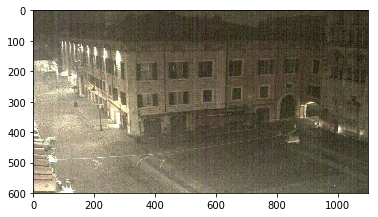

In [64]:
# Visualize misclassified example(s)
num = 7
test_mis_im = MISCLASSIFIED[num][0]
plt.imshow(test_mis_im)
print(str(MISCLASSIFIED[num][2]))

for i in range(len(MISCLASSIFIED)):
    print("its corect label is: ", MISCLASSIFIED[i][2], " brightness: ", avg_brightness(MISCLASSIFIED[i][0]))